# Simulation - Logisticc Regerssion


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
def generate_simulated_data(n, g, seed=42): 
    np.random.seed(seed)
    beta_zero = 0.5
    beta = np.ones(g)

    X = np.random.normal(0, 1, (n, g))

    p = expit(beta_zero + X @ beta)
    y = np.random.binomial(1, p, size=n)
    return X, y


In [3]:
def experiment(X, y, L, g): 
    beta_estiamted = []
    for _ in range(L): 
        log_reg = LogisticRegression(penalty=None, solver='lbfgs')
        log_reg.fit(X, y)
        beta_estiamted.append(log_reg.coef_[0])

    beta = np.ones((L, g))
    mse = mean_squared_error(beta, beta_estiamted)
    
    return mse


In [4]:
def plot_results(n_values, results, title): 
    sns.set_style("whitegrid")
    plt.plot(n_values, results)
    plt.title(title)
    plt.ylabel("MSE")
    plt.xlabel("n")
    plt.show()

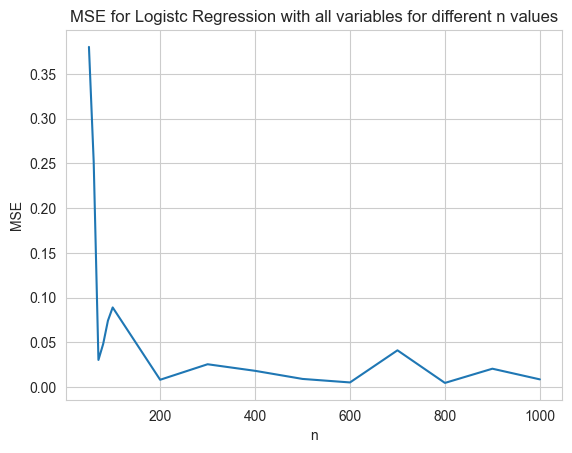

In [5]:
n_values = list(range(50, 101, 10)) + list(range(200, 1100, 100))
g = 5
L = 100

results = []

for n in n_values: 
    X, y = generate_simulated_data(n, g, seed=123)
    results.append(experiment(X, y, L, g))
    
plot_results(n_values, results, "MSE for Logistc Regression with all variables for different n values")


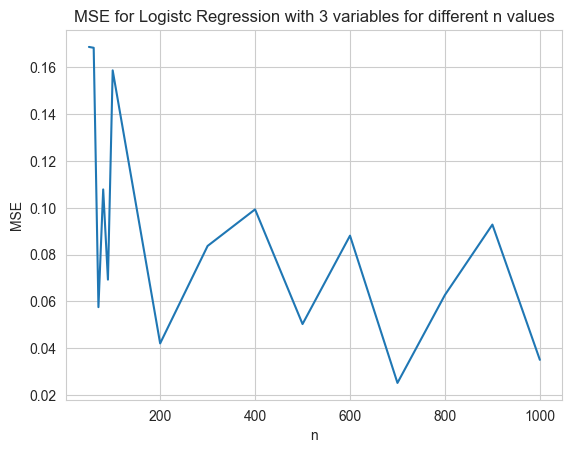

In [6]:
results = []

for n in n_values: 
    X, y = generate_simulated_data(n, g, seed=123)
    results.append(experiment(X[:, :3], y, L, 3))
    
plot_results(n_values, results, "MSE for Logistc Regression with 3 variables for different n values")